# **FIRST ANALYSIS**


> Aggiungi citazione



In [23]:
import pandas as pd
import numpy as np
from datetime import datetime

In [24]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
ESERCIZI = pd.read_csv('/content/drive/MyDrive/Comune-di-Milano-Esercizi-di-vicinato-in-sede-fissa.csv',sep=';',encoding='unicode_escape')
ESERCIZI


,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,CSO ITALIA N. 34 (z.d. 1),CSO,ITALIA,34,526,1.0,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,CSO LODI N. 104 (z.d. 4),CSO,LODI,104,4068,4.0,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,CSO LODI N. 26 (z.d. 5),CSO,LODI,26,4068,5.0,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,CSO SEMPIONE N. 41 (z.d. 6),CSO,SEMPIONE,41,7137,8.0,NaN,120.0,NaN,NaN,120.0
4,NaN,NaN,LGO SCALABRINI GIOVANNI BATTISTA N. 2 (z.d. 6),LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,Tabella speciale Monopolio;Alimentare,NaN,RIP DI PTA TICINESE N. 61 ; isolato:071; acces...,RIP,DI PTA TICINESE,61,5150,6.0,cartoleria cancelleria,25.0,27.0,21.0,52.0
24132,Tabella speciale Monopolio;Alimentare;Non Alim...,i.p.,VIA GALVANI LUIGI N. 34 ; isolato:238; accesso...,VIA,GALVANI LUIGI,34,1179,2.0,carburanti e lubrificanti,45.0,NaN,NaN,60.0
24133,tabella speciale monopolio;non alimentare,tabacchi noli,VIA MARINO TOMMASO N. 7 ;gll vittorio emanuele...,VIA,MARINO TOMMASO,7,204,1.0,articoli per fumatori,28.0,12.0,NaN,40.0
24134,Tabella speciale Monopolio;Non Alimentare,NaN,VIA ASELLI GASPARE N. 11 (z.d. 3),VIA,ASELLI GASPARE,11,3167,3.0,commercio al dettaglio,7.0,125.0,5.0,132.0


In [40]:
ESERCIZI.shape


(24136, 13)

In [41]:
ESERCIZI.columns

Index(['Settore Merceologico', 'Insegna', 'Ubicazione', 'Tipo via', 'Via',
       'Civico', 'Codice via', 'ZD', 'Settore Storico Cf Preval',
       'Superficie Vendita', 'Superficie Altri Usi',
       'Superficie Tabelle Speciali', 'Superficie Totale'],
      dtype='object')

In [42]:
ESERCIZI.dtypes

,0
Settore Merceologico,object
Insegna,object
Ubicazione,object
Tipo via,object
Via,object
Civico,object
Codice via,object
ZD,float64
Settore Storico Cf Preval,object
Superficie Vendita,float64


In [43]:
DUPLICATES = ESERCIZI.duplicated()

In [44]:
#any shows if duplicates exist
print(DUPLICATES.any())
ESERCIZI[DUPLICATES]

True


,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
1186,alimentare,NaN,VIA MONCALIERI N. 15 interno merc. comun. cope...,VIA,MONCALIERI,15,1095,9.0,"frutta, verdura e funghi",44.0,24.0,NaN,68.0
4287,alimentare;non alimentare,di per di,VIA DEI TRANSITI N. 20 ; isolato:332; accesso:...,VIA,DEI TRANSITI,20,2284,2.0,supermercato alimentare,250.0,NaN,NaN,340.0
5904,non alimentare,NaN,LGO SAN DIONIGI IN PRATOCENTENARIO num.078; is...,LGO,SAN DIONIGI IN PRATOCENTENARIO,NaN,1722,9.0,accessori e ricambi auto-moto,200.0,NaN,NaN,600.0
6323,non alimentare,NaN,PZA DEL DUOMO centro strada num.002; isolato:4...,PZA,DEL DUOMO,NaN,1,1.0,edicola,8.0,NaN,NaN,8.0
6334,non alimentare,NaN,PZA DEL DUOMO N. 20 ;pza del duomo 020; isolat...,PZA,DEL DUOMO,20,1,1.0,abbigliamento donna,250.0,NaN,NaN,250.0
6667,non alimentare,NaN,PZA VELASCA N. 10 ;pza velasca 010; isolato:35...,PZA,VELASCA,10,335,1.0,calzature,44.0,47.0,NaN,91.0
6753,non alimentare,NaN,RIP DI PTA TICINESE N. 85 ; isolato:064; acces...,RIP,DI PTA TICINESE,85,5150,6.0,materiali da costruzione,38.0,NaN,NaN,38.0
7632,non alimentare,NaN,VIA BRAMANTE N. 33 ; isolato:077; accesso: acc...,VIA,BRAMANTE,33,7123,8.0,abbigliamento,25.0,NaN,NaN,25.0
8077,non alimentare,NaN,VIA CASATI FELICE N. 3 ; isolato:106; accesso:...,VIA,CASATI FELICE,3,2122,3.0,macch.e arredamenti per uffici,57.0,4.0,NaN,61.0
8563,non alimentare,NaN,VIA COZZI ROBERTO N. 30 ; isolato:166; accesso...,VIA,COZZI ROBERTO,30,1436,9.0,materiali da costruzione,30.0,570.0,NaN,600.0


In [45]:
ESERCIZI.duplicated().sum()

32

In [46]:
ESERCIZI.duplicated().sum()/ESERCIZI.shape[0]*100

0.1325820351342393

In [47]:
#display the number of not null values for each column
ESERCIZI.count()

,0
Settore Merceologico,24031
Insegna,6989
Ubicazione,24135
Tipo via,24134
Via,24135
Civico,23486
Codice via,24134
ZD,24134
Settore Storico Cf Preval,24103
Superficie Vendita,24106


In [48]:
#total number of not null values
NOT_NULL = ESERCIZI.count().sum()

#total number of null values
NULL = ESERCIZI.isnull().sum().sum()
ESERCIZI.isnull().sum().sum()

print("number of non null values are: " , NOT_NULL)
print("number of  null values are: " , NULL)


number of non null values are:  257652
number of  null values are:  56116


In [49]:
#total number of cells
TOT = ESERCIZI.shape[0]*ESERCIZI.shape[1]
TOT

313768

In [36]:
TOT = NOT_NULL + NULL
TOT

313768

In [37]:
COMPLETENESS = NOT_NULL / TOT

COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

82.1%


In [50]:
ESERCIZI['Settore Merceologico'].value_counts()

,count
Settore Merceologico,
non alimentare,16469
alimentare,2972
Non Alimentare,1346
alimentare;non alimentare,1130
tabella speciale monopolio,737
Alimentare,351
tabella speciale farmacie,275
Alimentare;Non Alimentare,143
tabella speciale carburanti,135


# **DATA PROFILING**


In [59]:
!pip install sweetviz lux-api autoviz plotly matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.4 MB/s eta 0:00:00
  Created wheel for lux-api: fil

In [60]:
import pandas as pd
import json
import seaborn as sns
import sweetviz as sv
import lux
from autoviz import AutoViz_Class
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [51]:
#describe function get different properties for all the numerical attributes of the table
ESERCIZI.describe()

,ZD,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
count,24134.000000,24106.000000,9038.000000,1127.000000,24100.000000
mean,4.339935,56.762715,67.852069,37.138421,98.350747
std,2.791555,49.281531,280.890686,29.824418,266.692535
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,25.000000,10.000000,13.000000,35.000000
50%,4.000000,40.000000,21.000000,30.000000,55.000000
75%,7.000000,70.000000,50.000000,52.500000,100.000000
max,60.000000,250.000000,9056.000000,230.000000,11942.000000


In [52]:
#display numeric columns
NUM = list(ESERCIZI.select_dtypes(include=['int64','float64']).columns)
NUM

['ZD',
 'Superficie Vendita',
 'Superficie Altri Usi',
 'Superficie Tabelle Speciali',
 'Superficie Totale']

In [53]:
#display categorical columns
CAT = list(ESERCIZI.select_dtypes(include=['bool','object']).columns)
CAT

['Settore Merceologico',
 'Insegna',
 'Ubicazione',
 'Tipo via',
 'Via',
 'Civico',
 'Codice via',
 'Settore Storico Cf Preval']

array([[<Axes: title={'center': 'ZD'}>,
        <Axes: title={'center': 'Superficie Vendita'}>],
       [<Axes: title={'center': 'Superficie Altri Usi'}>,
        <Axes: title={'center': 'Superficie Tabelle Speciali'}>],
       [<Axes: title={'center': 'Superficie Totale'}>, <Axes: >]],
      dtype=object)

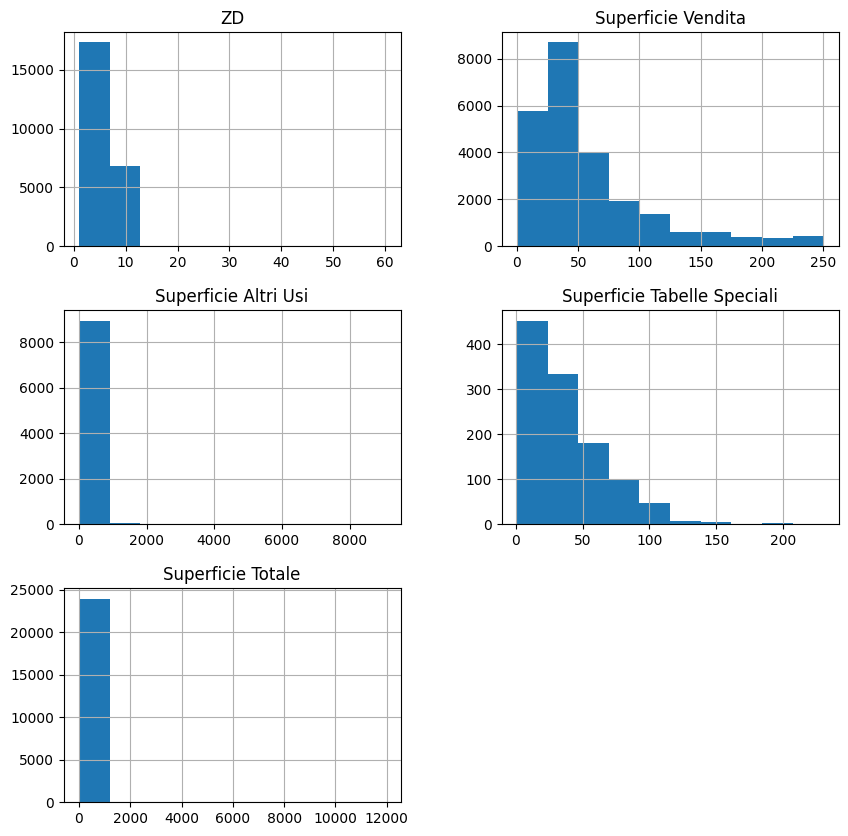

In [54]:
ESERCIZI.hist(figsize=(10,10))

In [55]:
#correlation evaluation base on pearson correlation coefficient
ESERCIZI[NUM].corr(method='pearson')

,ZD,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
ZD,1.000000,-0.054853,0.038957,0.059140,0.020508
Superficie Vendita,-0.054853,1.000000,0.140736,0.851919,0.272046
Superficie Altri Usi,0.038957,0.140736,1.000000,-0.076606,0.987492
Superficie Tabelle Speciali,0.059140,0.851919,-0.076606,1.000000,0.205318
Superficie Totale,0.020508,0.272046,0.987492,0.205318,1.000000


In [56]:
#correlation evaluation base on kendall correlation coefficient
ESERCIZI[NUM].corr(method ='kendall')

,ZD,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
ZD,1.000000,-0.046366,-0.014483,0.033286,-0.025418
Superficie Vendita,-0.046366,1.000000,0.161981,0.810637,0.615860
Superficie Altri Usi,-0.014483,0.161981,1.000000,-0.101092,0.586476
Superficie Tabelle Speciali,0.033286,0.810637,-0.101092,1.000000,0.313397
Superficie Totale,-0.025418,0.615860,0.586476,0.313397,1.000000


In [57]:
#correlation evaluation base on spearman correlation coefficient
corr = ESERCIZI[NUM].corr(method ='spearman')
corr


,ZD,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
ZD,1.000000,-0.064920,-0.020347,0.046748,-0.035884
Superficie Vendita,-0.064920,1.000000,0.229460,0.906805,0.734510
Superficie Altri Usi,-0.020347,0.229460,1.000000,-0.149045,0.751721
Superficie Tabelle Speciali,0.046748,0.906805,-0.149045,1.000000,0.406918
Superficie Totale,-0.035884,0.734510,0.751721,0.406918,1.000000


<Axes: >

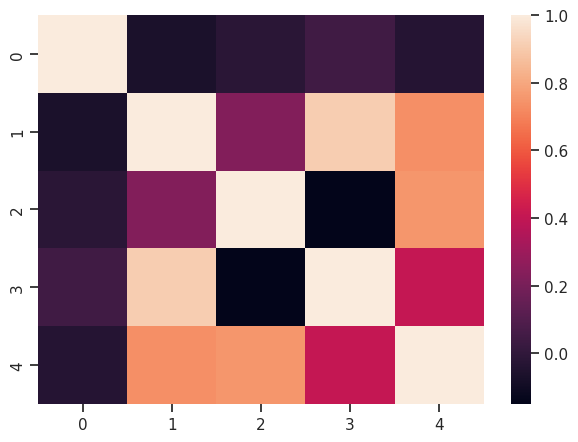

In [61]:
#correlation evaluation heatmap
sns.heatmap(corr)

                                             |          | [  0%]   00:00 -> (? left)


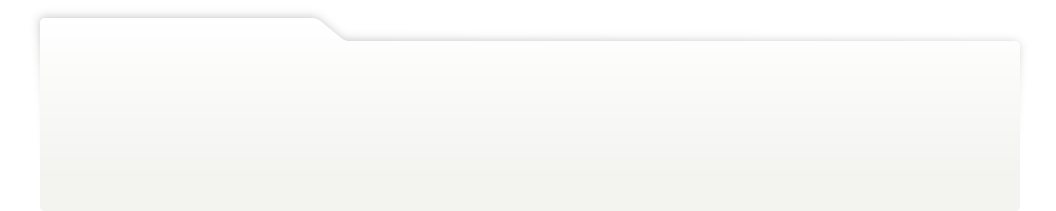
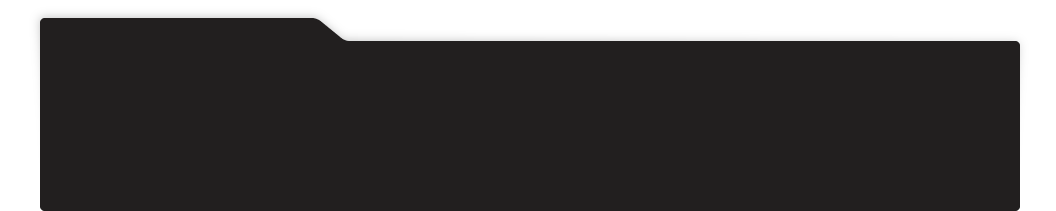
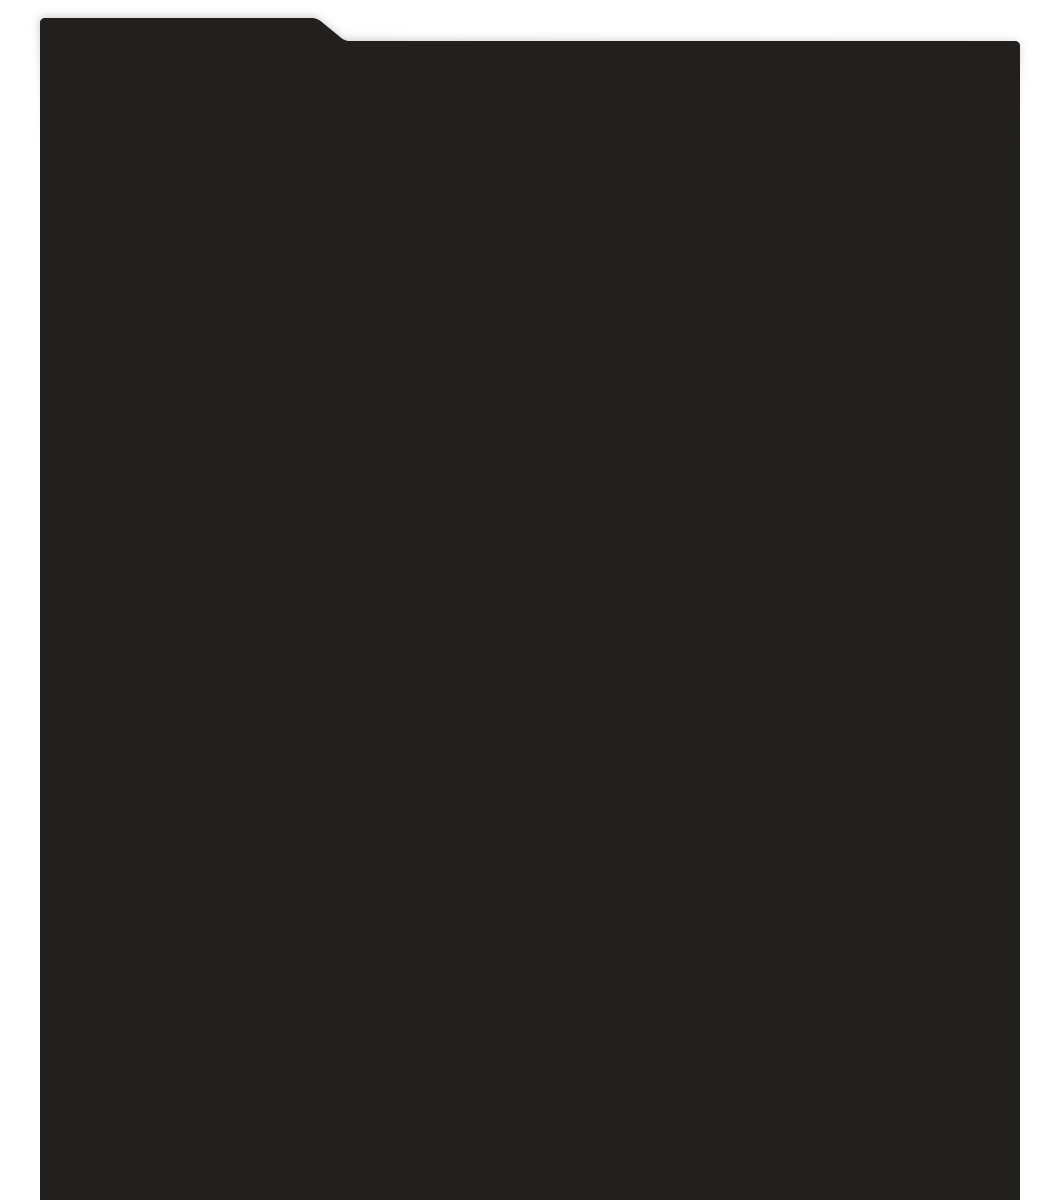
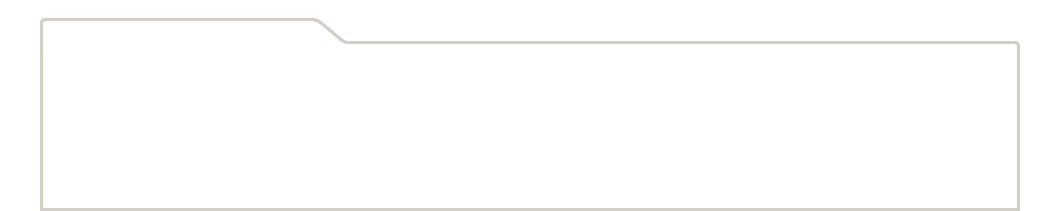
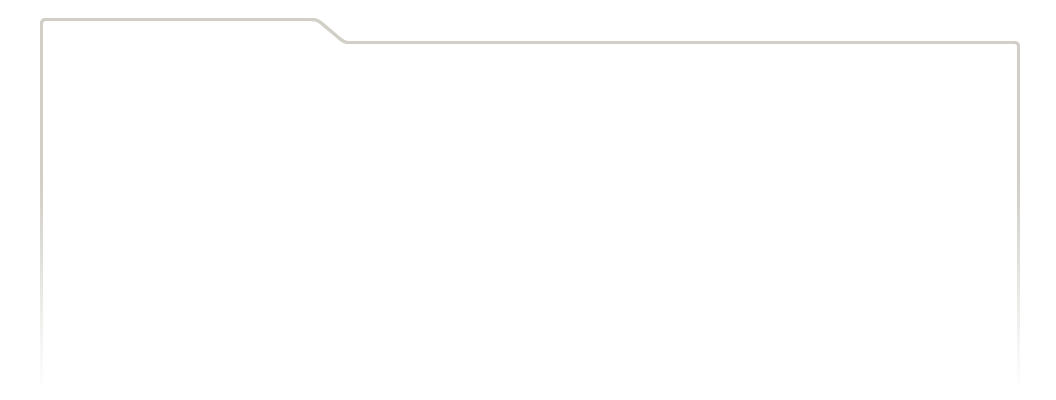
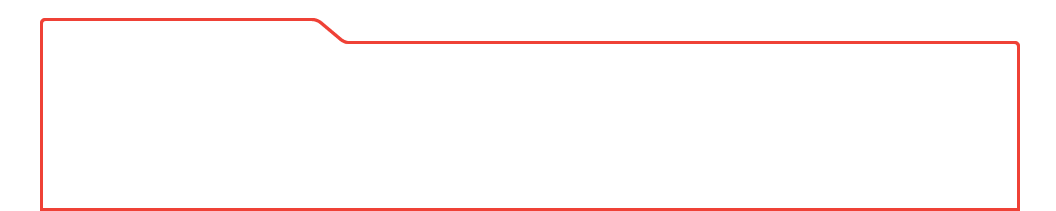
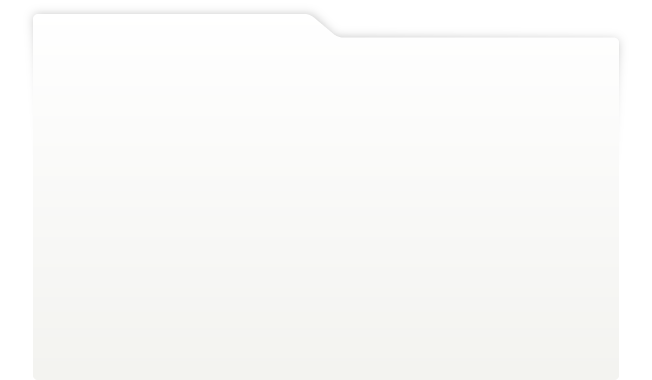
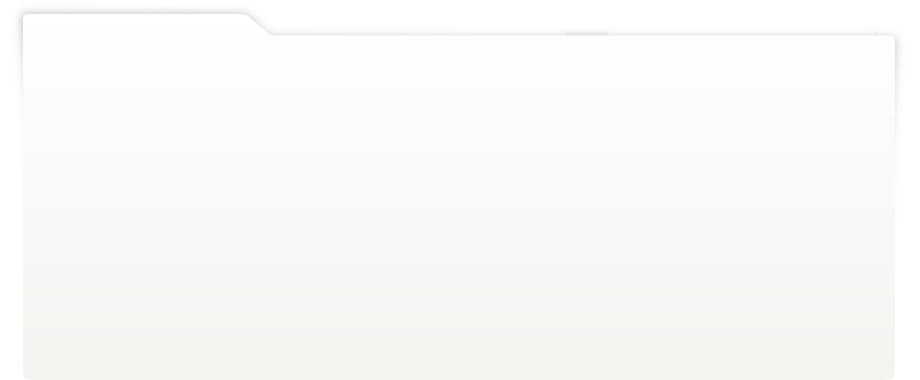
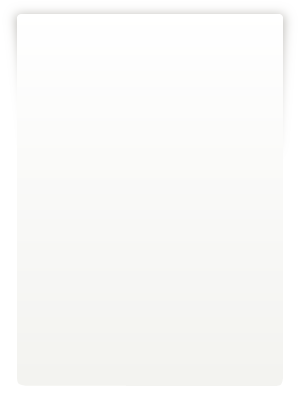
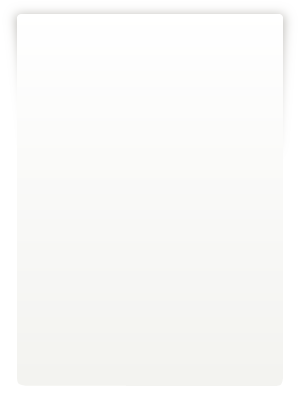
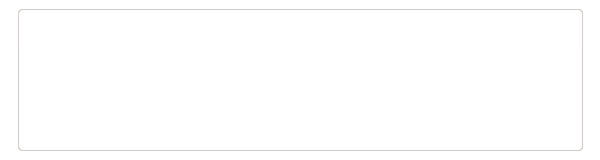
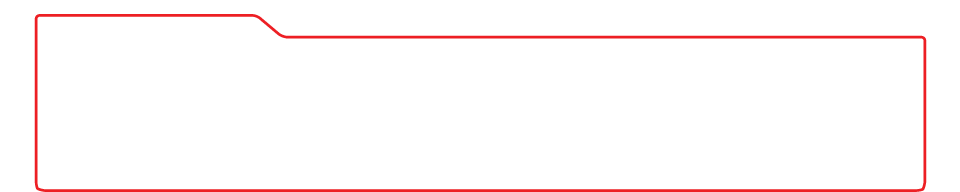
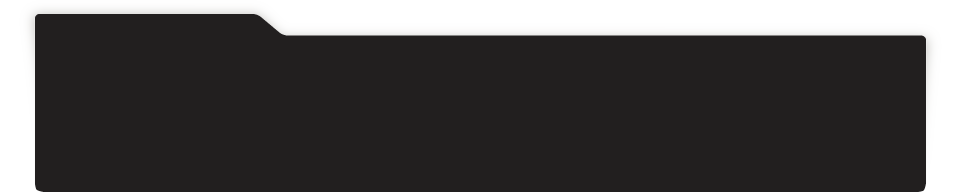
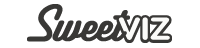
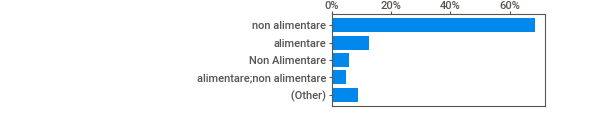
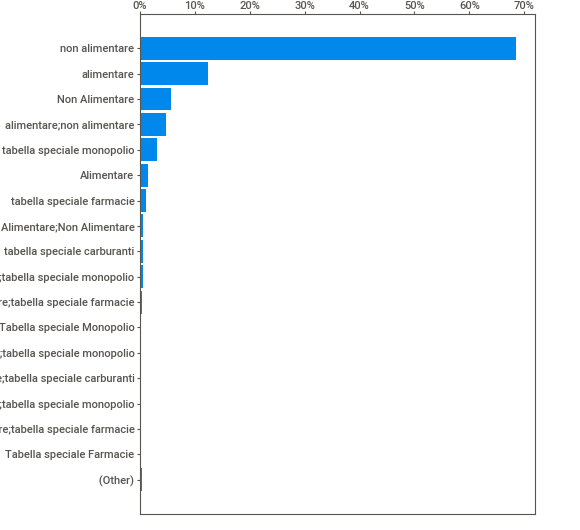
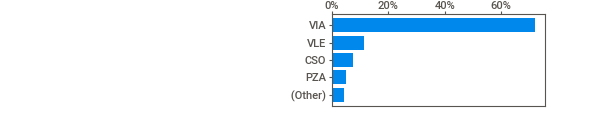
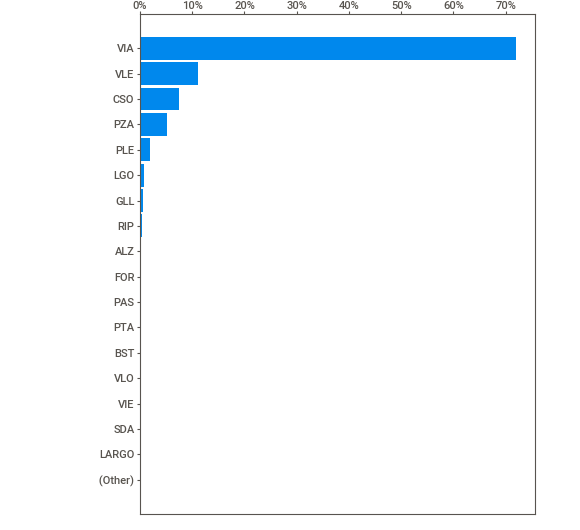
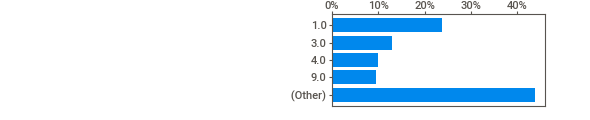
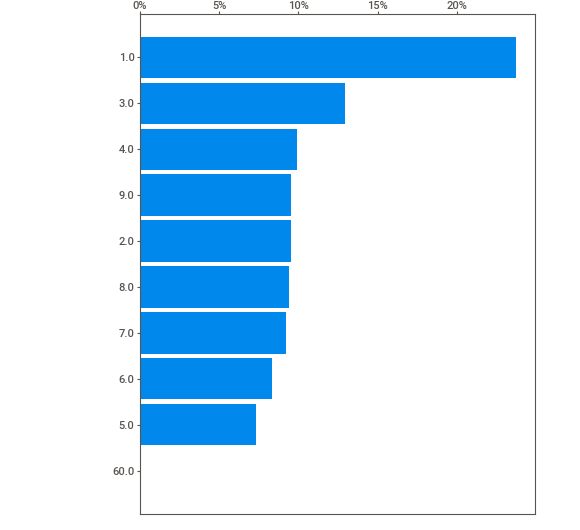
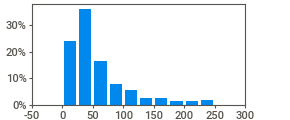
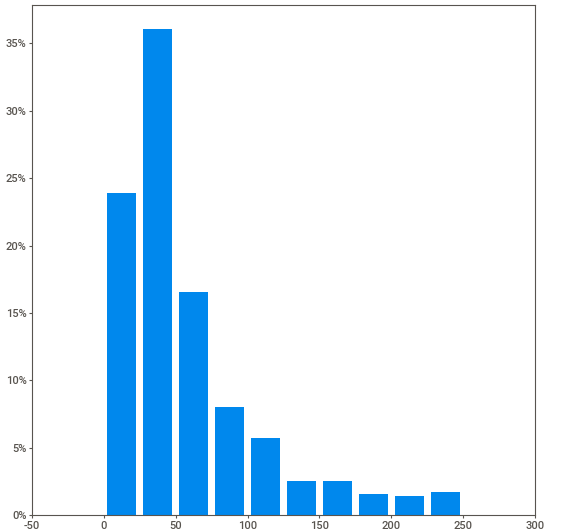
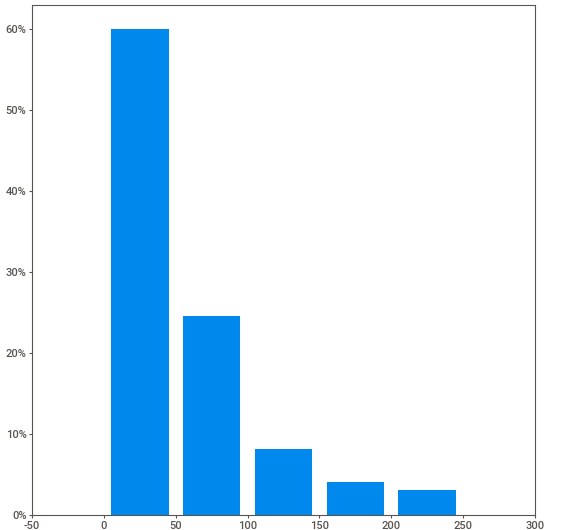
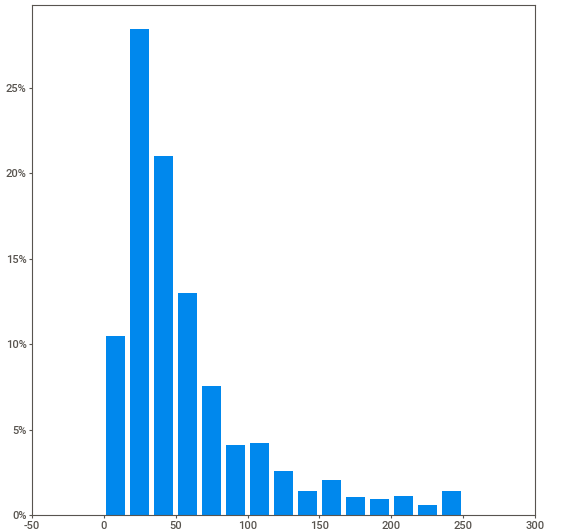
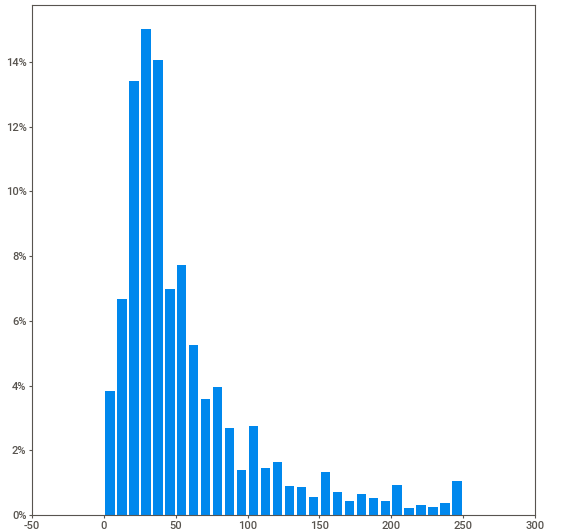
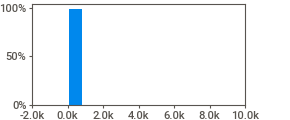
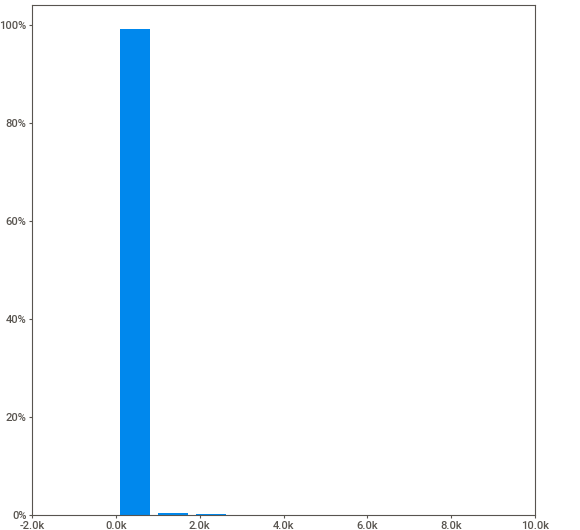
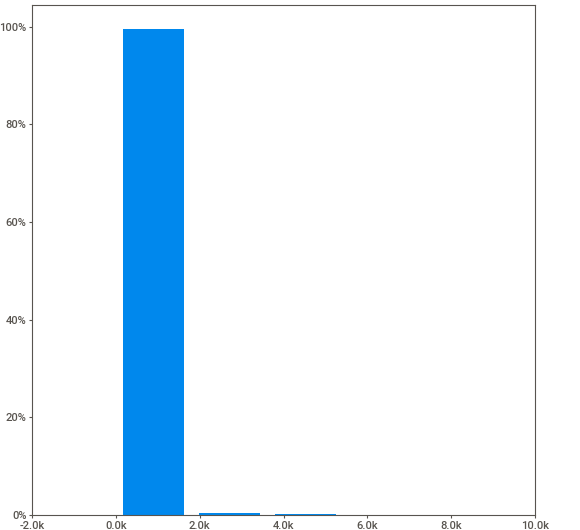
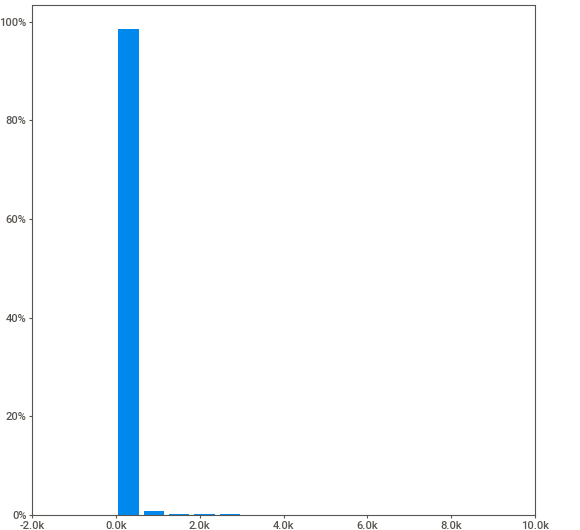
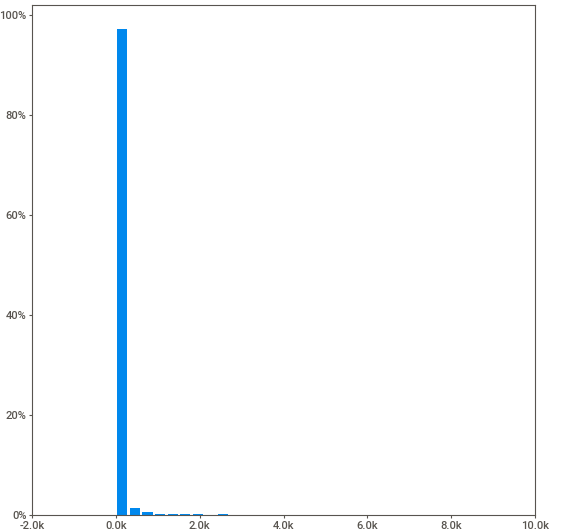
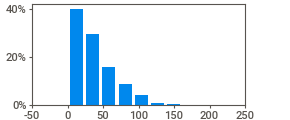
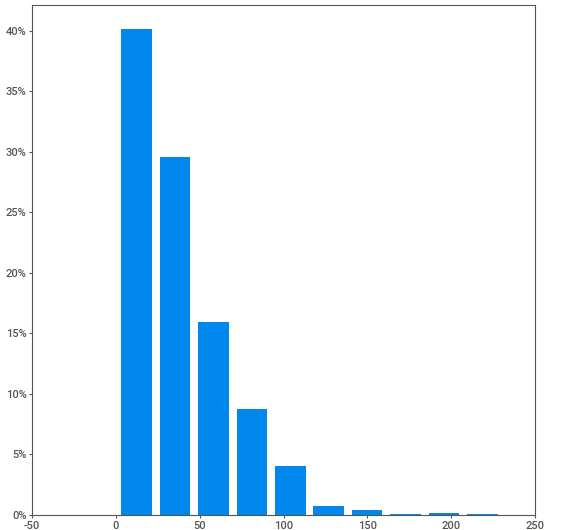
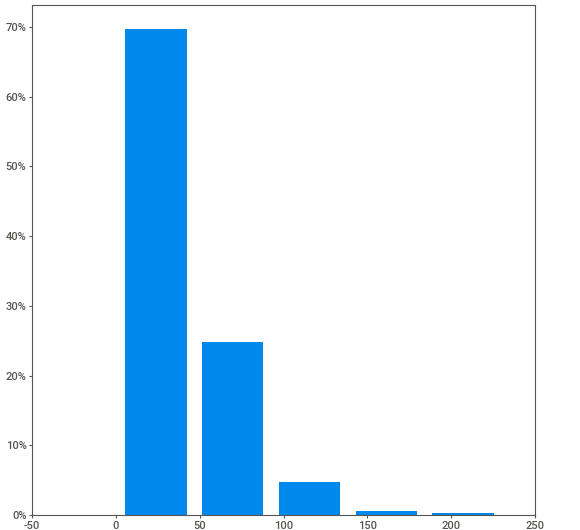
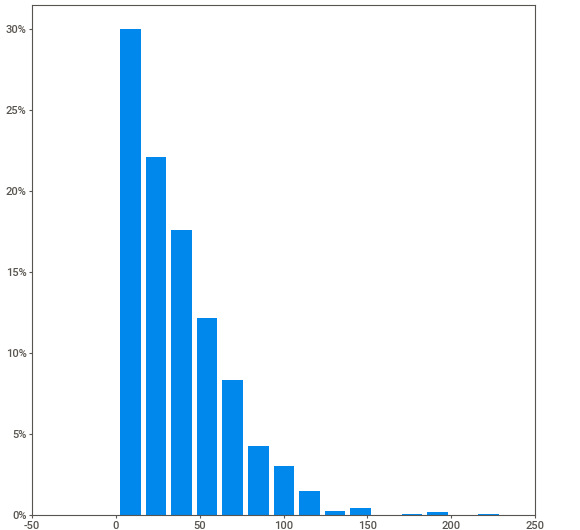
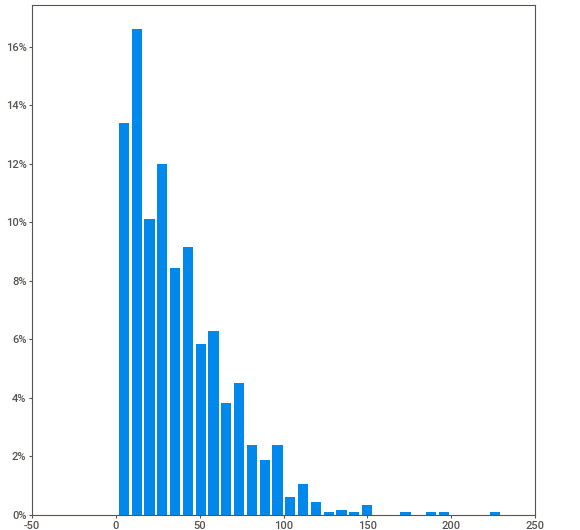
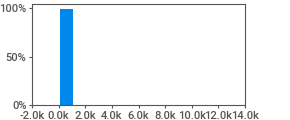
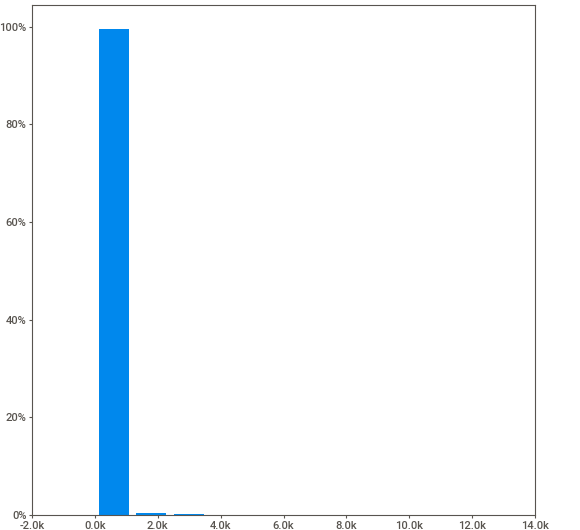
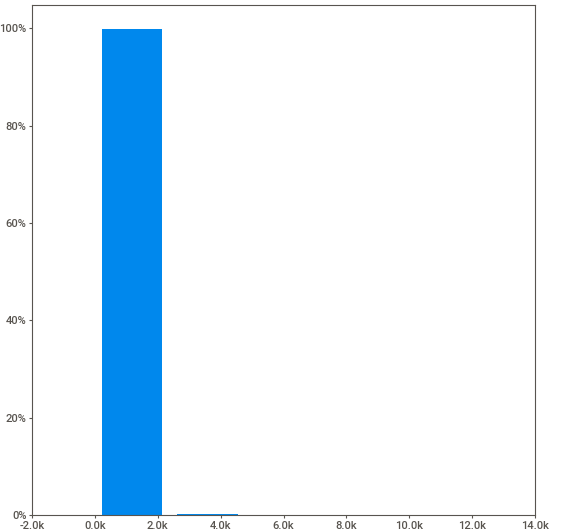
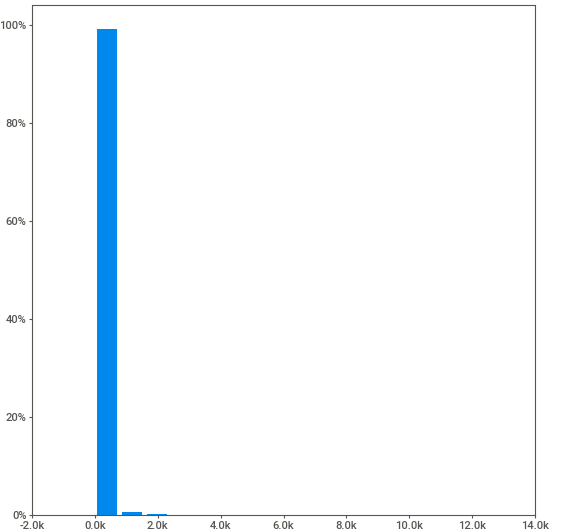
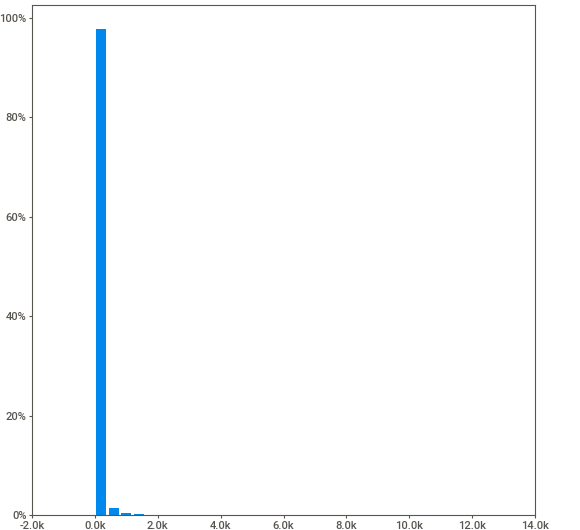
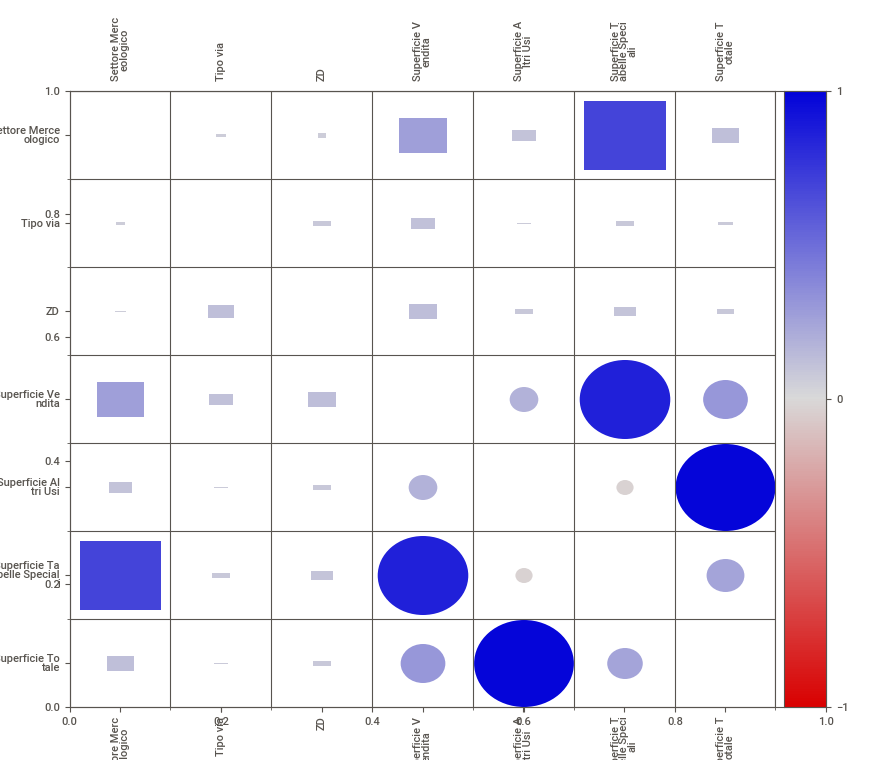
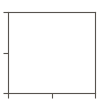

In [62]:
sweet_report = sv.analyze([ESERCIZI,'Sweetviz Report'])
sweet_report.show_notebook()

# **DATA WRANGLING**

In [63]:
#STANDARDIZATION OF THE COLUMN "Settore Merceologico"
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Non Alimentare', 'Settore Merceologico'] = 'non alimentare'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare', 'Settore Merceologico'] = 'alimentare'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Non Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Monopolio', 'Settore Merceologico'] = 'tabella speciale monopolio'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Farmacie', 'Settore Merceologico'] = 'tabella speciale farmacie'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Non Alimentare;Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'alimentare;Non Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'non alimentare;Tabella speciale Monopolio', 'Settore Merceologico'] = 'non alimentare;tabella speciale monopolio'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Non Alimentare;Tabella speciale Monopolio', 'Settore Merceologico'] = 'non alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Carburanti', 'Settore Merceologico'] = 'tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Carburanti;Non Alimentare', 'Settore Merceologico'] = 'non alimentare;tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'non alimentare;alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Non Alimentare;Tabella speciale Farmacie;Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale farmacie'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;', 'Settore Merceologico'] = 'alimentare'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Monopolio;Non Alimentare', 'Settore Merceologico'] = 'non alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Non Alimentare;Tabella speciale Farmacie', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale farmacie'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Non Alimentare;Tabella speciale Monopolio', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Tabella speciale Monopolio', 'Settore Merceologico'] = 'alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Carburanti;Alimentare', 'Settore Merceologico'] = 'alimentare;tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'non alimentare;tabella speciale farmacie;Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale farmacie'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Monopolio;Alimentare;Non Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Carburanti;Alimentare;Non Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'tabella speciale carburanti;alimentare;non alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Farmacie;Alimentare;Non Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale farmacie'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'tabella speciale carburanti;non alimentare', 'Settore Merceologico'] = 'non alimentare;tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'non alimentare;Tabella speciale Farmacie', 'Settore Merceologico'] = 'non alimentare;tabella speciale farmacie'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Tabella speciale Monopolio;Alimentare', 'Settore Merceologico'] = 'alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'non alimentare;Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'tabella speciale monopolio;non alimentare', 'Settore Merceologico'] = 'non alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'alimentare;Tabella speciale Farmacie', 'Settore Merceologico'] = 'alimentare;tabella speciale farmacie'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Tabella speciale Farmacie', 'Settore Merceologico'] = 'alimentare;tabella speciale farmacie'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Non Alimentare;Alimentare;Tabella speciale Monopolio', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale monopolio'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Non Alimentare;Alimentare;Tabella speciale Carburanti', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Non Alimentare;Tabella speciale Carburanti;Alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale carburanti'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Non Alimentare;Tabella speciale Carburanti;Tabella speciale Monopolio', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale carburanti;tabella speciale monopolio'

ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;non alimentare', 'Settore Merceologico'] = 'alimentare;non alimentare'
ESERCIZI.loc[ESERCIZI['Settore Merceologico'] == 'Alimentare;Non Alimentare;Tabella speciale Monopolio;Tabella speciale Carburanti', 'Settore Merceologico'] = 'alimentare;non alimentare;tabella speciale carburanti;tabella speciale monopolio'

ESERCIZI

,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,CSO ITALIA N. 34 (z.d. 1),CSO,ITALIA,34,526,1.0,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,CSO LODI N. 104 (z.d. 4),CSO,LODI,104,4068,4.0,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,CSO LODI N. 26 (z.d. 5),CSO,LODI,26,4068,5.0,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,CSO SEMPIONE N. 41 (z.d. 6),CSO,SEMPIONE,41,7137,8.0,NaN,120.0,NaN,NaN,120.0
4,NaN,NaN,LGO SCALABRINI GIOVANNI BATTISTA N. 2 (z.d. 6),LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,alimentare;tabella speciale monopolio,NaN,RIP DI PTA TICINESE N. 61 ; isolato:071; accesso: accesso esterno; (z.d. 6),RIP,DI PTA TICINESE,61,5150,6.0,cartoleria cancelleria,25.0,27.0,21.0,52.0
24132,alimentare;non alimentare;tabella speciale monopolio,i.p.,VIA GALVANI LUIGI N. 34 ; isolato:238; accesso: accesso esterno; (z.d. 2),VIA,GALVANI LUIGI,34,1179,2.0,carburanti e lubrificanti,45.0,NaN,NaN,60.0
24133,non alimentare;tabella speciale monopolio,tabacchi noli,VIA MARINO TOMMASO N. 7 ;gll vittorio emanuele 000; isolato:415; accesso: accesso esterno; (z.d. 1),VIA,MARINO TOMMASO,7,204,1.0,articoli per fumatori,28.0,12.0,NaN,40.0
24134,non alimentare;tabella speciale monopolio,NaN,VIA ASELLI GASPARE N. 11 (z.d. 3),VIA,ASELLI GASPARE,11,3167,3.0,commercio al dettaglio,7.0,125.0,5.0,132.0


In [64]:
ESERCIZI['Settore Merceologico'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()